In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline
%config InlineBackend.figure_format = 'svg'

import seaborn as sns
# nice / large graphs
sns.set_context("notebook")
plt.rcParams["figure.figsize"] = (8, 5)

Populating the interactive namespace from numpy and matplotlib


<center>
<h1>Machine Learning Weekend</h1>
<br>

<img src="http://scikit-learn.org/stable/_images/scikit-learn-logo-notext.png" style="width: 30%;">

<br>
<h3>Mojmír Vinkler</h3>
<br>
mojmir.vinkler@gmail.com
</center>

# What is `scikit-learn`?

* Free software machine learning library for the Python



# Why `scikit-learn`?

* Simple and efficient tools for data mining and data analysis
* Accessible to everybody, and reusable in various contexts
* Built on NumPy, SciPy, and matplotlib
* Open source, commercially usable - BSD license

# Installation
```
pip install scikit-learn
```

# 1. Loading Data

## Loading sample scikit-learn datasets

In [2]:
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()
iris['data'][:5, :]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [3]:
iris['target'][:5]

array([0, 0, 0, 0, 0])

## Loading data from .csv file with pandas

In [4]:
df = pd.DataFrame(iris['data'], columns=iris.feature_names)
df['target'] = iris['target']
df.target = df.target.map(dict(zip(range(3), iris.target_names)))
df.to_csv('iris.csv', index=False)

In [5]:
import pandas as pd
df = pd.read_csv('iris.csv')
y = df['target'].map({'setosa': 0, 'versicolor': 1, 'virginica': 2})
X = df.drop('target', 1)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df['target'].value_counts()

versicolor    50
setosa        50
virginica     50
Name: target, dtype: int64

# 2. Transforming your Data

* Scikit-learn estimators **support only numerical features**. So any text or categorical features must be transformed before training.
* Scikit-learn does not allow **missing (NaN) values**

## Turning the text content into numerical feature vectors

In [7]:
news = datasets.fetch_20newsgroups(subset='train', categories=['alt.atheism', 'soc.religion.christian'])
print(news.data[0][:600])

From: nigel.allen@canrem.com (Nigel Allen)
Subject: library of congress to host dead sea scroll symposium april 21-22
Lines: 96


 Library of Congress to Host Dead Sea Scroll Symposium April 21-22
 To: National and Assignment desks, Daybook Editor
 Contact: John Sullivan, 202-707-9216, or Lucy Suddreth, 202-707-9191
          both of the Library of Congress

   WASHINGTON, April 19  -- A symposium on the Dead Sea 
Scrolls will be held at the Library of Congress on Wednesday,
April 21, and Thursday, April 22.  The two-day program, cosponsored
by the library and Baltimore Hebrew University, with


In [8]:
from sklearn.feature_extraction.text import CountVectorizer

# bag of words representation
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(news.data)
X_counts

<1079x19666 sparse matrix of type '<class 'numpy.int64'>'
	with 195086 stored elements in Compressed Sparse Row format>

In [9]:
# sparseness
X_counts.sum() / (X_counts.shape[0] * X_counts.shape[1])

0.018001222830914831

## Standardization

= normalize your data to have zero mean and unit stadard deviation

In [10]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(iris['data'])
scaler.mean_, scaler.scale_

(array([ 5.84333333,  3.054     ,  3.75866667,  1.19866667]),
 array([ 0.82530129,  0.43214658,  1.75852918,  0.76061262]))

In [11]:
X_iris_transformed = scaler.transform(iris['data'])
X_iris_transformed[:, 0].mean()

-1.4684549872375404e-15

## Imputation of missing values

In [12]:
import numpy as np
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit([[1, 2], [np.nan, 3], [7, 6]])

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [13]:
imp.transform([[np.nan, np.nan]])

array([[ 4.        ,  3.66666667]])

## Pipelines

Framework for chaining feauture extractors, vectorizers and estimators.

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

text_pipe = Pipeline([('vect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('clf', MultinomialNB()),])
text_pipe

Pipeline(steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...inear_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

# 3. Choosing Proper Model

<center>
<img src="http://scikit-learn.org/stable/_static/ml_map.png" style="width: 60%;">
</center>

Source: http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [15]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [16]:
clf = RandomForestClassifier(random_state=3, max_depth=5, n_jobs=-1)
clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=3,
            verbose=0, warm_start=False)

# 4. Model Training

In [17]:
from sklearn.model_selection import train_test_split

X = iris['data']
y = iris['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
print('Train size: {}'.format(len(X_train)))
print('Test size: {}'.format(len(X_test)))

Train size: 120
Test size: 30


In [18]:
%%time
clf.fit(X_train, y_train)

CPU times: user 19.3 ms, sys: 4.32 ms, total: 23.6 ms
Wall time: 119 ms


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=3,
            verbose=0, warm_start=False)

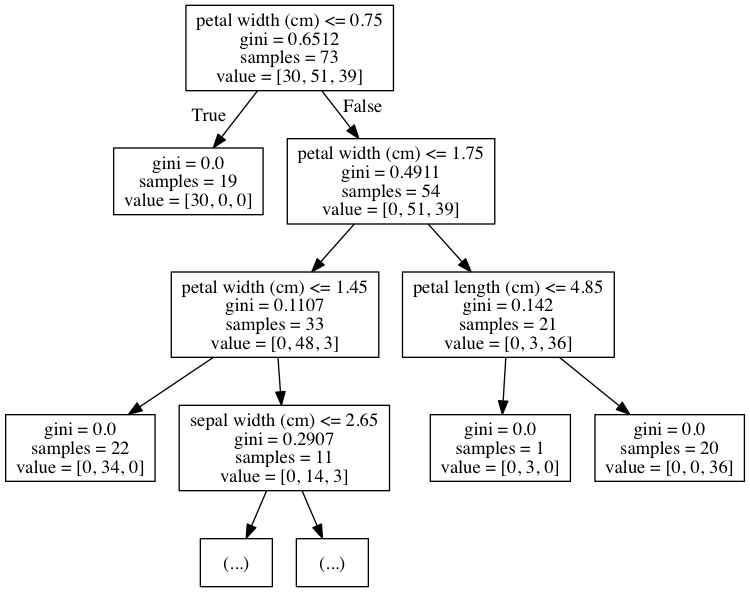

In [19]:
import pydotplus as pydot
from IPython.core.display import Image, SVG
from io import StringIO
from sklearn.tree import export_graphviz

def show_tree(tree, max_depth=3, height=600, width=600, feature_names=None):
    io = StringIO()
    export_graphviz(tree, out_file=io, max_depth=max_depth, feature_names=feature_names)
    graph = pydot.graph_from_dot_data(io.getvalue())
    return Image(graph.create_png(), height=height, width=width)
    
show_tree(clf.estimators_[0], feature_names=iris.feature_names)

# 5. Making Predictions

In [20]:
clf.predict(X_test[:5])

array([0, 0, 0, 0, 0])

In [21]:
clf.predict_proba(X_test[:5, :])

array([[ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 0.9,  0.1,  0. ]])

## Model persistence

In [22]:
import pickle

# saving your model
with open('myclassifier.pkl', 'wb') as f:
    pickle.dump(clf, f)

In [23]:
# somewhere far far away in production
with open('myclassifier.pkl', 'rb') as f:
    clf = pickle.load(f)
clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=3,
            verbose=0, warm_start=False)

# 6. Model Evaluation

## Evaluation on test data

In [24]:
from sklearn import metrics
y_pred = clf.predict(X_train)
print(metrics.classification_report(y_train, y_pred, target_names=iris.target_names))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        40
 versicolor       1.00      0.97      0.99        40
  virginica       0.98      1.00      0.99        40

avg / total       0.99      0.99      0.99       120



In [25]:
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred, target_names=iris.target_names))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        10
 versicolor       0.91      1.00      0.95        10
  virginica       1.00      0.90      0.95        10

avg / total       0.97      0.97      0.97        30



## Feature importance

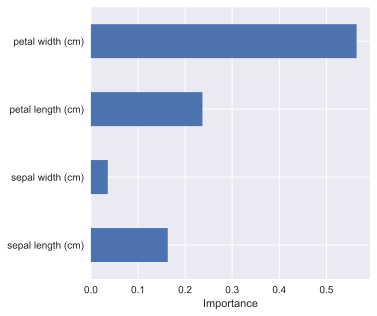

In [26]:
ax = pd.Series(clf.feature_importances_, index=iris.feature_names).plot(kind='barh', figsize=(5, 5))
ax.set(xlabel='Importance');

## Train-test curves

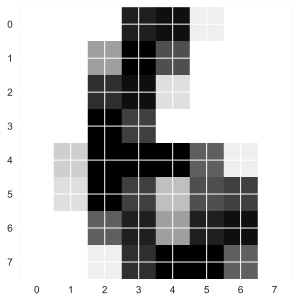

In [27]:
from sklearn.datasets import load_digits
from sklearn.model_selection import validation_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier

digits = load_digits()
X_digits, _, y_digits, _ = train_test_split(digits.data, digits.target, test_size=0)
plt.imshow(X_digits[0, :].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')

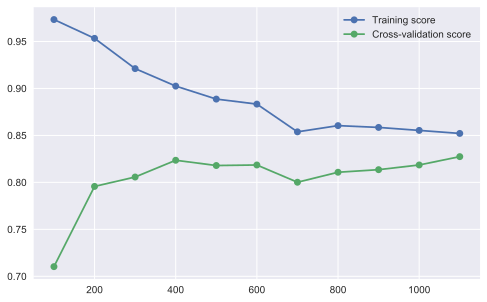

In [28]:
from sklearn.model_selection import learning_curve
estimator = GaussianNB()

train_sizes, train_scores, test_scores = learning_curve(
    estimator,
    X_digits, y_digits,
    train_sizes=range(100, 1195, 100),
    n_jobs=-1
)
plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', label='Training score')
plt.plot(train_sizes, test_scores.mean(axis=1), 'o-', label='Cross-validation score')
plt.legend(loc="best");

# 7. Cross-validation

In [29]:
from sklearn.model_selection import cross_val_score
import numpy as np

cv = 5
scores = cross_val_score(clf, iris.data, iris.target, cv=cv, scoring='accuracy')
print('CV scores: {:.3f} +- {:.3f}'.format(scores.mean(), scores.std()))

CV scores: 0.947 +- 0.040


# 8. Hyperparameter Optimization

In [30]:
clf = RandomForestClassifier()
clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [31]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'max_depth': [3, 5, 10],
    'min_samples_leaf': [1, 5, 10, 30],
}
gcv = GridSearchCV(clf, parameters, scoring='accuracy', n_jobs=-1)
gcv.fit(X, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_depth': [3, 5, 10], 'min_samples_leaf': [1, 5, 10, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [32]:
for params, mean_test_score, std_test_score in zip(gcv.cv_results_['params'],
                                                  gcv.cv_results_['mean_test_score'],
                                                  gcv.cv_results_['std_test_score']):
    print('{}: {:.3f} +- {:.3f}'.format(params, mean_test_score, std_test_score))
        
print('\nBest:')
print(gcv.best_params_)

{'max_depth': 3, 'min_samples_leaf': 1}: 0.967 +- 0.033
{'max_depth': 3, 'min_samples_leaf': 5}: 0.953 +- 0.024
{'max_depth': 3, 'min_samples_leaf': 10}: 0.947 +- 0.018
{'max_depth': 3, 'min_samples_leaf': 30}: 0.720 +- 0.049
{'max_depth': 5, 'min_samples_leaf': 1}: 0.960 +- 0.016
{'max_depth': 5, 'min_samples_leaf': 5}: 0.947 +- 0.033
{'max_depth': 5, 'min_samples_leaf': 10}: 0.940 +- 0.042
{'max_depth': 5, 'min_samples_leaf': 30}: 0.667 +- 0.000
{'max_depth': 10, 'min_samples_leaf': 1}: 0.960 +- 0.028
{'max_depth': 10, 'min_samples_leaf': 5}: 0.953 +- 0.037
{'max_depth': 10, 'min_samples_leaf': 10}: 0.960 +- 0.028
{'max_depth': 10, 'min_samples_leaf': 30}: 0.693 +- 0.039

Best:
{'max_depth': 3, 'min_samples_leaf': 1}


# Scikit-learn Cheat Sheet

<center>
<img src="https://shequcdn.bigquant.com/uploads/default/original/2X/c/c53416ffdd3e74e5a2b277fe77940deade8007cb.jpg" style="width: 60%;">
</center>

Source: https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Scikit_Learn_Cheat_Sheet_Python.pdf